In [1]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter


In [2]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
df = pd.read_csv("/content/Reviews.csv")

In [4]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
96218,96219,B004HOLD4W,A1TMAVN4CEM8U8,Gunner,2.0,2.0,5.0,1.336349e+09,My 10th favorite flavor,Diamond Almonds<br />Almonds are a good source...
96219,96220,B004HOLD4W,A3914DFUXE505Z,Jimmy Tran,2.0,2.0,5.0,1.330214e+09,Delicious!,These almonds are my favorite flavor from Blue...
96220,96221,B004HOLD4W,A11FGUW6UFYDNQ,queenie548,2.0,2.0,5.0,1.329437e+09,delicious almonds!,these almonds are totally addictive!!! and de...
96221,96222,B004HOLD4W,A7EK88GF8N40F,Nicole S. Urdang,2.0,2.0,5.0,1.328746e+09,Incredible,I love sensational flavors and these almonds r...


In [14]:
df = df[['Text']]
df['sentiment_score'] = df['Text'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

In [17]:
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

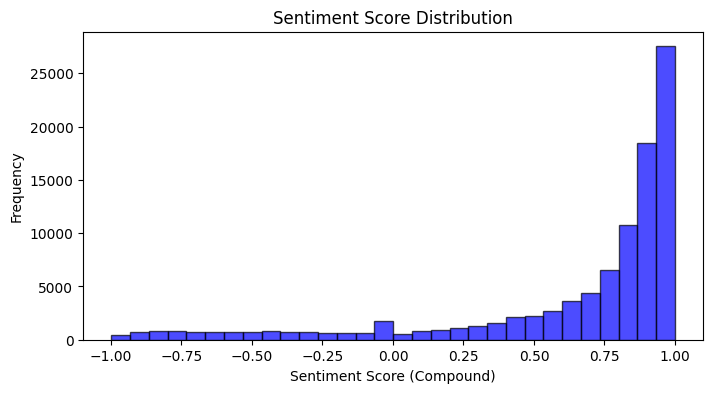

In [18]:
plt.figure(figsize=(8,4))
plt.hist(df['sentiment_score'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Sentiment Score (Compound)")
plt.ylabel("Frequency")
plt.title("Sentiment Score Distribution")
plt.show()

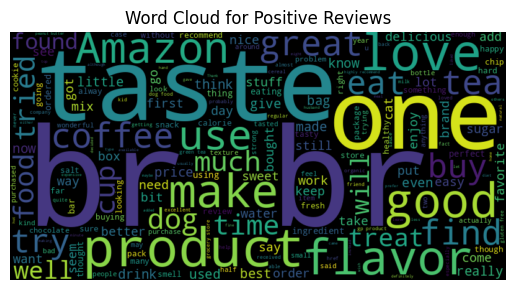

In [20]:

positive_text = " ".join(df[df['sentiment'] == 'Positive'] ['Text'])
worldcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()